# Customer Churn Analysis

## Data Description
 Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. So the task is to predict the customer churn using given set of data.

Import required libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [2]:
df=pd.read_csv('Customer Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data has been imported and we can see the first 5 rows of the data using df.head() function

## Exploratory Data Analysis

In [3]:
df.shape

(7043, 21)

This is the shape of data

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

These are the datatypes of each columns which includes integer,object and float values 

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

These are the columns of data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The data does not have null values

In [10]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,9046-JBFWA,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Mean is higher than median in SeniorCitizen,tenure

Many data is in NaN because the data is in object format

In [11]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

This column only has two data yes and no so our target variable is binary

In [13]:
df.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

## Using LabelEncoder for data type conversion

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']
for val in list1:
    df[val]=le.fit_transform(df[val])

In [15]:
df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

All the object data converted to integer format

In [16]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1
7042,2226,1,0,0,0,66,1,0,1,2,...,2,2,2,2,2,1,0,105.65,5407,0


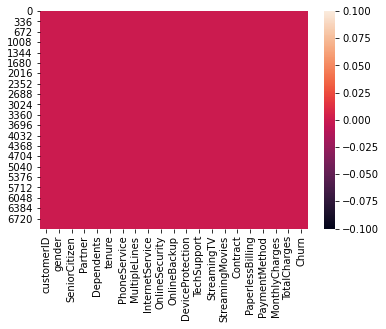

In [17]:
sns.heatmap(df.isnull())

There are no missing data or null values 

## Correlation Matrix

In [18]:
dfcor=df.corr()
dfcor

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


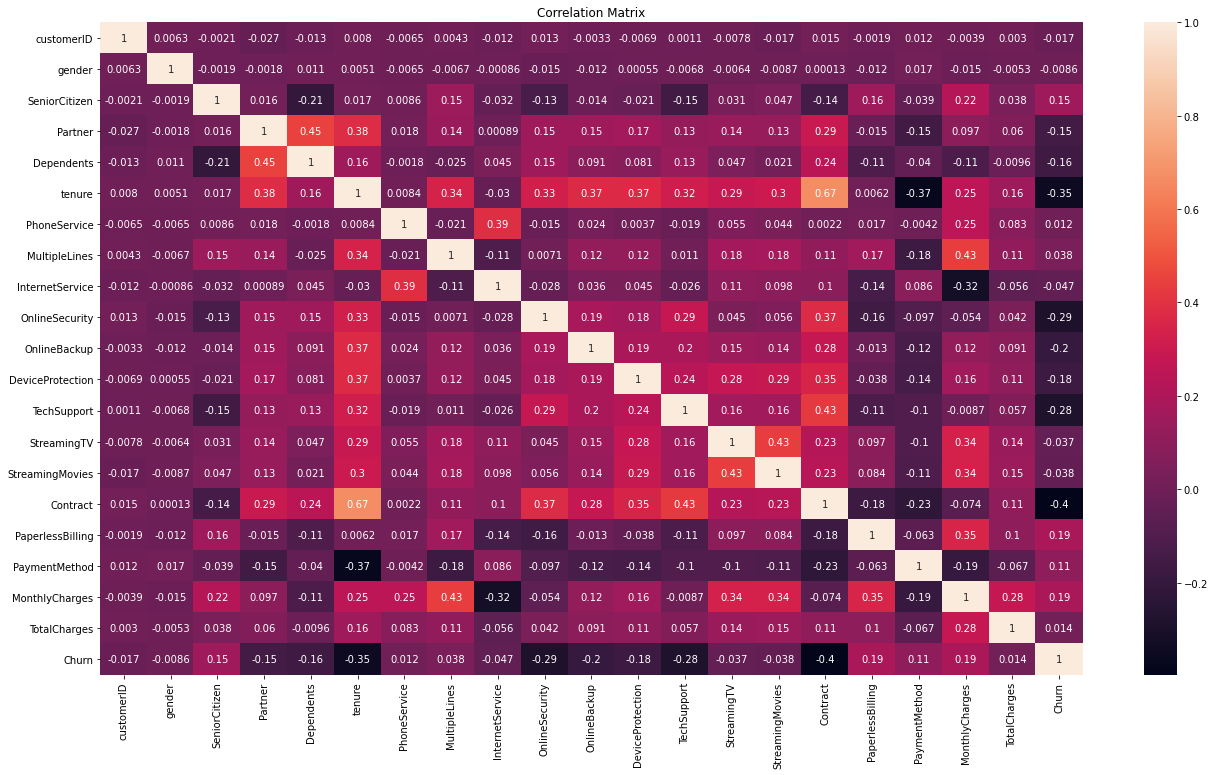

In [19]:
plt.figure(figsize=[22,12])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

Churn and Contract are negatively correlated to each other.

Partner is positively correlated with Dependents.

tenure is negatively correlated with Churn.

Churn and Senior Citizen are positively correlated with each other.

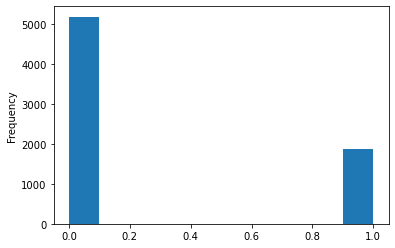

In [20]:
df['Churn'].plot.hist()

0 has the highest frequency

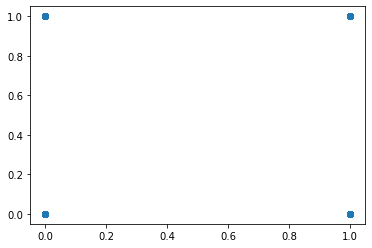

In [22]:
plt.scatter(df['Churn'],df['SeniorCitizen'])
plt.show()

This shows the relation between Churn and SeniorCitizen

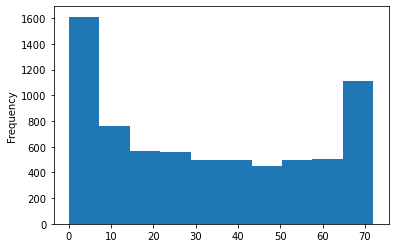

In [24]:
df['tenure'].plot.hist()

Frequency is high for 0 

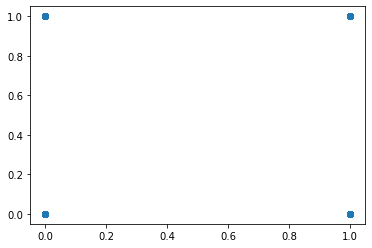

In [23]:
plt.scatter(df['Partner'],df['Dependents'])
plt.show()

Scatterplot stating the relation between partner and dependents

## Checking Outliers using boxplot

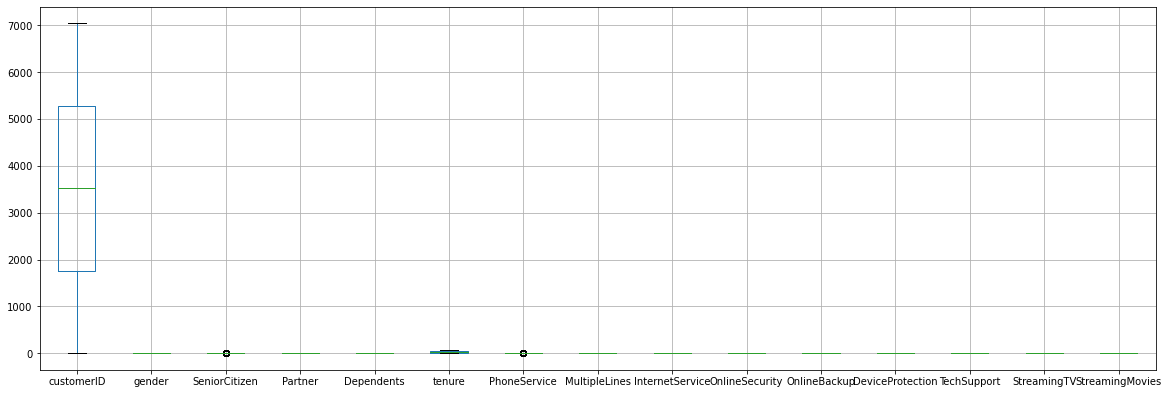

In [25]:
df.iloc[:,0:15].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are very few ouliers in Senior Citizen,PhoneService

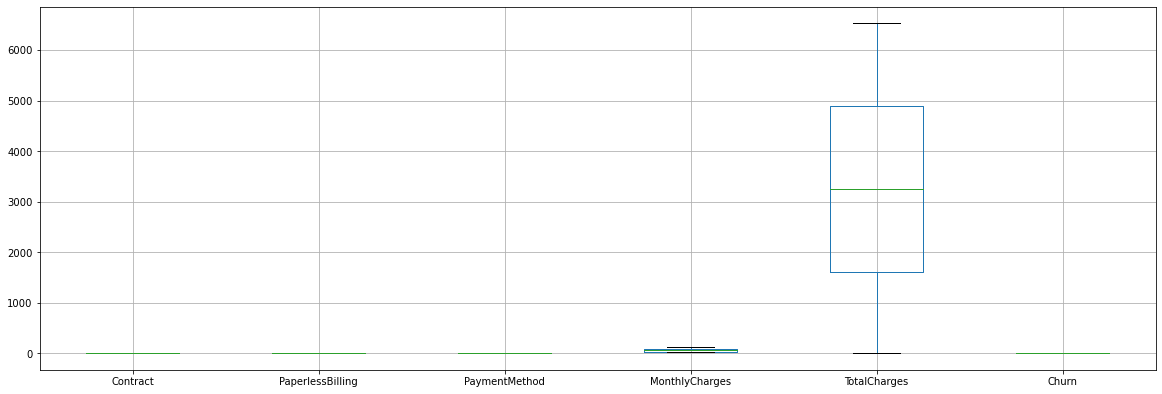

In [26]:
df.iloc[:,15:21].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are no outliers in above column

In [27]:
collist=df.columns.values
ncol=35
nrows=11

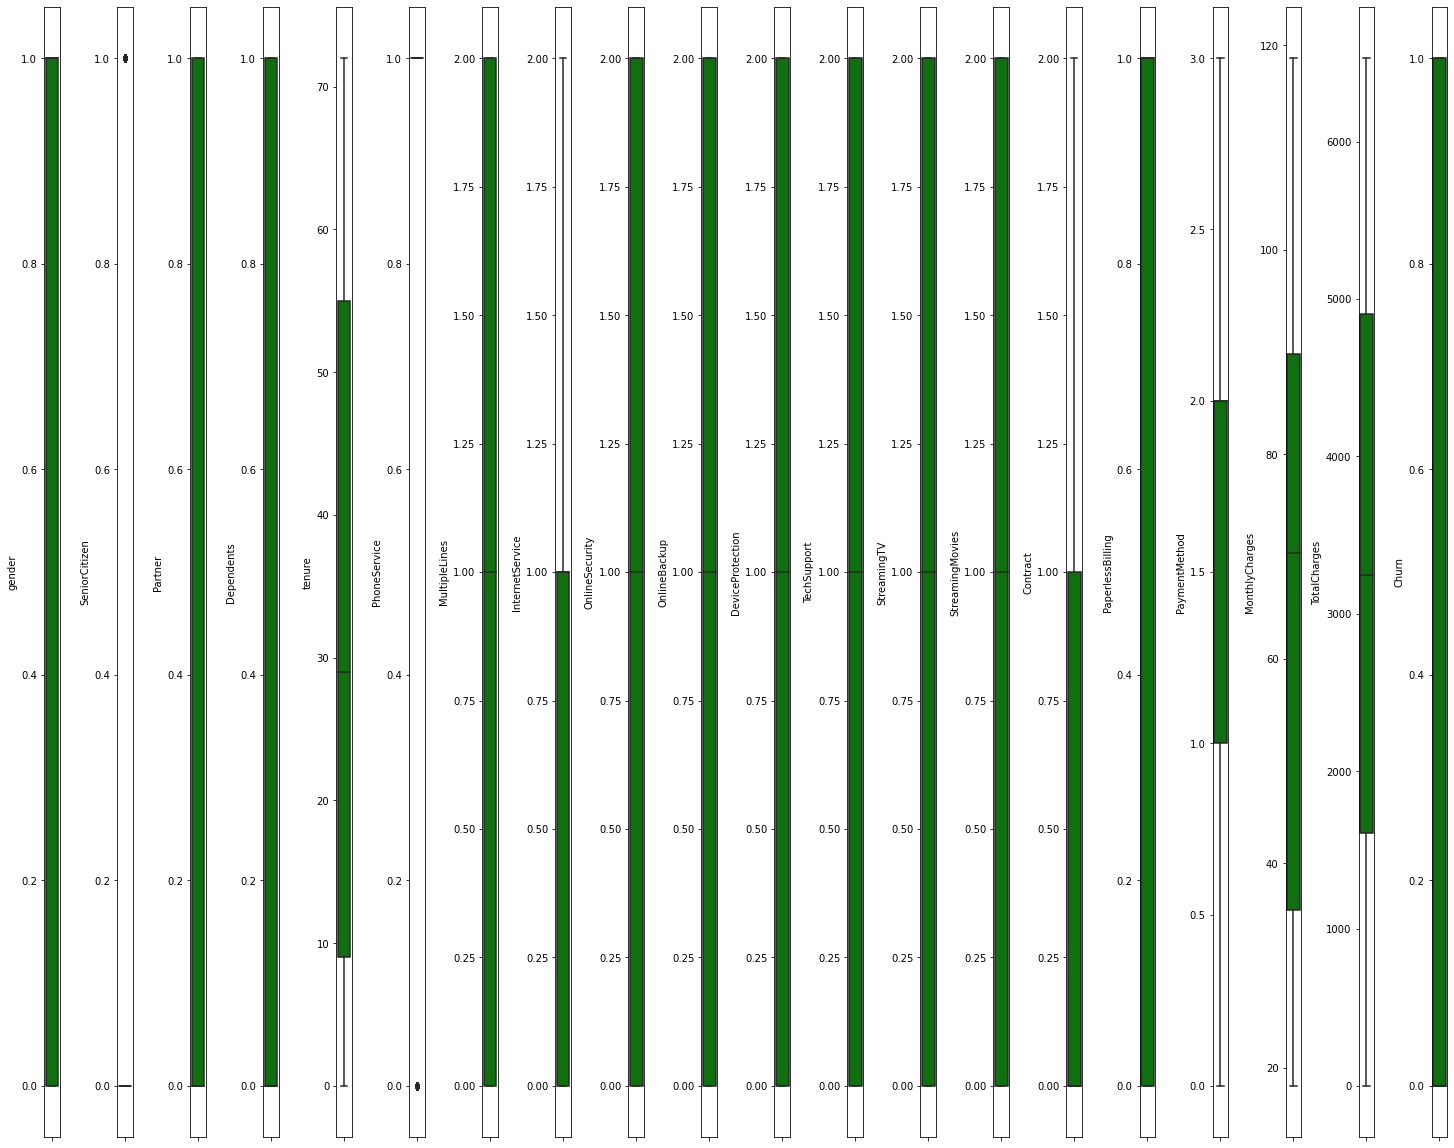

In [28]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

## Removing Outliers

In [29]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.91189045, 1.00955867, 0.43991649, ..., 1.16032292, 0.39860759,
        0.60102348],
       [0.21690598, 0.99053183, 0.43991649, ..., 0.25962894, 0.94876238,
        0.60102348],
       [0.47070074, 0.99053183, 0.43991649, ..., 0.36266036, 1.64188328,
        1.66382851],
       ...,
       [0.07574495, 1.00955867, 0.43991649, ..., 1.1686319 , 0.13968008,
        0.60102348],
       [1.18683477, 0.99053183, 2.27315869, ..., 0.32033821, 0.31653445,
        1.66382851],
       [0.63694614, 0.99053183, 0.43991649, ..., 1.35896134, 1.13801338,
        0.60102348]])

In [30]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [31]:
df_new=df[(z<3).all(axis=1)]

In [32]:
 df.shape

(7043, 21)

In [33]:
df_new.shape

(6361, 21)

In [34]:
loss_percent=(7043-6361)/7043*100
print(loss_percent)

9.683373562402386


Outliers are removed

## Checking skewness

In [35]:
x=df_new.drop("Churn",axis=1)

In [36]:
x.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.041683
dtype: float64

There is skewness in SeniorCitizen,Dependents,Contract

## Removing skewness

In [41]:
from sklearn.preprocessing import power_transform
df_churn=power_transform(x)
df_churn=pd.DataFrame(df_churn,columns=x.columns)

In [42]:
df_churn.skew()

customerID         -0.287288
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure             -0.243524
PhoneService        0.000000
MultipleLines       0.132058
InternetService    -0.108986
OnlineSecurity      0.131110
OnlineBackup       -0.023610
DeviceProtection   -0.014523
TechSupport         0.123477
StreamingTV        -0.122478
StreamingMovies    -0.126613
Contract            0.301765
PaperlessBilling   -0.386613
PaymentMethod      -0.207901
MonthlyCharges     -0.331859
TotalCharges       -0.310817
dtype: float64

Skewness is removed from few columns

In [43]:
x=df_churn

In [44]:
x.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6356,-0.788545,-1.007416,-0.441591,-0.972245,-0.653600,1.339615,0.0,-0.936163,1.385344,0.566989,0.306210,0.322242,0.554724,0.125933,0.118159,1.343722,0.825243,-1.487776,-1.489211,-1.383899
6357,0.687845,0.992638,-0.441591,1.028548,1.529987,-0.080871,0.0,1.068190,-1.398221,1.273724,-1.104348,1.176478,1.268751,1.102254,1.099395,0.789436,0.825243,1.319167,0.566204,-0.832600
6358,-0.923238,-1.007416,-0.441591,1.028548,1.529987,1.339615,0.0,1.068190,0.102542,-0.992711,1.170277,1.176478,-0.997781,1.102254,1.099395,0.789436,0.825243,-0.520116,1.209756,1.184718
6359,1.127528,0.992638,2.264538,1.028548,-0.653600,-1.266945,0.0,1.068190,0.102542,-0.992711,-1.104348,-1.097257,-0.997781,-1.186007,-1.189604,-0.888722,0.825243,1.319167,0.210036,-0.234495
6360,-0.532907,0.992638,-0.441591,-0.972245,-0.653600,1.199246,0.0,-0.936163,0.102542,1.273724,-1.104348,1.176478,1.268751,1.102254,1.099395,1.343722,0.825243,-1.487776,1.296617,1.060301


In [45]:
y=df_new["Churn"]

In [46]:
y.tail()

7037    0
7038    0
7039    0
7041    1
7042    0
Name: Churn, dtype: int32

## Finding the best Random_State

In [47]:
from sklearn.linear_model import LogisticRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.8266107909900472  on Random_state 41


## Creating train-test split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=41)

In [49]:
model=[GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier()]

In [50]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy_score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score of GaussianNB() is :
0.787323205866946
[[1121  288]
 [ 118  382]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1409
           1       0.57      0.76      0.65       500

    accuracy                           0.79      1909
   macro avg       0.74      0.78      0.75      1909
weighted avg       0.82      0.79      0.80      1909



Accuracy_score of SVC() is :
0.819800942902043
[[1313   96]
 [ 248  252]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1409
           1       0.72      0.50      0.59       500

    accuracy                           0.82      1909
   macro avg       0.78      0.72      0.74      1909
weighted avg       0.81      0.82      0.81      1909



Accuracy_score of DecisionTreeClassifier() is :
0.7433211105290728
[[1155  254]
 [ 236  264]]
              precision    recall  f1-score   support

           0       0.83      0.82     

Logistic Regression has highest accuracy compared to others which is 82

## Cross validation

In [51]:
svr=SVC()

In [52]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [53]:
from sklearn.model_selection import cross_val_score

In [55]:
gbscores = cross_val_score(gb,x,y,cv=5)
print(gbscores.mean())

0.7596284960500378


In [56]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

0.7979873472755388


In [57]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.7305447687085922


In [58]:
knnscores = cross_val_score(knn,x,y,cv=5)
print(svrscores.mean())

0.7979873472755388


In [59]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.8047465008621243


In [60]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.7956292272500457


Cross validation scores can be observed

Minimum difference between accuracy_score and cross validation for DecisionTreeClassifier is less which is 1

## Hyper parameter Tunning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [63]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [66]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [67]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [68]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [69]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [70]:
accuracy_score(y_test,GCV_pred)

0.8171817705605029

Accuracy score has improved using the best parameter

## AUC_ROC Curve

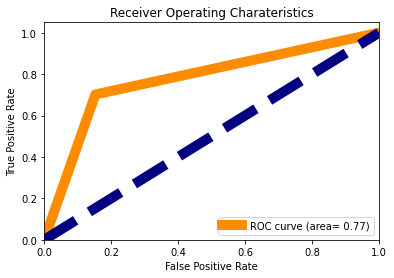

In [71]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(predm,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10, label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charateristics')
plt.legend(loc="lower right" )
plt.show()

## Saving the best Model

In [72]:
import joblib
joblib.dump(GCV.best_estimator_,"Customer Churn Analysis.pkl")

['Customer Churn Analysis.pkl']